In [1]:
import numpy as np
import pandas as pd
from pyecharts import HeatMap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) -1 # 最后一个默认是y值
    dataMat = []
    labelMat = []
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = []
            curLine = line.strip().split('\t') 
            for i in range(numFeat):
                lineArr.append(float(curLine[i])) # 这里可以使用np.ndarray 的自动类型转换，以及loadtext函数，自动将类型装换为float64
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
def lwlr(testpoint,xArr,yARR,k = 1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye(m)) # weights * xMat 对角阵乘以一个矩阵，相当于对每一行乘以一个lemta -> 每一行有一个权重了
    for j in range(m):
        diffMat = testpoint - xMat[j,:]
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
#     print((weights*xMat))
    xTx = xMat.T*(weights*xMat)
    if np.linalg.det(xTx) == 0.0: # np.linalg.det() 检查行列式是否为零
        print('行列式为0，逆矩阵不存在')
        return 
    ws = xTx.I *(xMat.T*weights*yMat)
    return testpoint*ws,weights.sum(1)

In [4]:
def lwlrTest(testArr,xArr,yArr,k =1.0):
    m = np.shape(testArr)[0] # 这里的类型不统一
    yHat = np.zeros((m))
    for i in range(m):
        yHat[i],_= lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [5]:
xArr,yArr = loadDataSet('./ex0.txt')

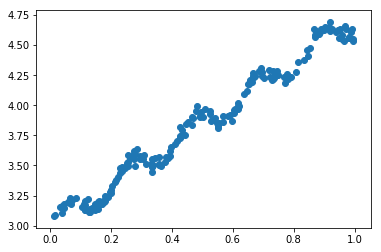

In [6]:
# 数据检查
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(xMat[:,1],yMat[:,0]) # 绘图需要使用的维度必须是1维的
ax.scatter(xMat[:,1].T.A,yMat[:,0].T.A)
plt.show()

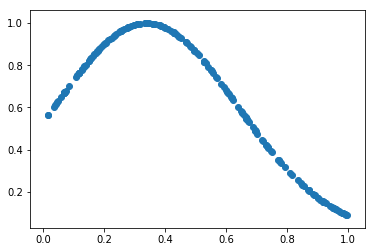

matrix([[ 0.5625483 ],
        [ 0.56358629],
        [ 0.60089413],
        [ 0.60992517],
        [ 0.61429181],
        [ 0.6241272 ],
        [ 0.6289559 ],
        [ 0.64965551],
        [ 0.66644051],
        [ 0.66792109],
        [ 0.6679911 ],
        [ 0.66914698],
        [ 0.67138935],
        [ 0.67386732],
        [ 0.6741507 ],
        [ 0.68010416],
        [ 0.70347312],
        [ 0.74479724],
        [ 0.75271241],
        [ 0.76205853],
        [ 0.76318515],
        [ 0.76332354],
        [ 0.76413662],
        [ 0.7795641 ],
        [ 0.78291453],
        [ 0.79383971],
        [ 0.79474535],
        [ 0.80368261],
        [ 0.82034334],
        [ 0.82123403],
        [ 0.82973045],
        [ 0.83482898],
        [ 0.83491258],
        [ 0.84441447],
        [ 0.85194711],
        [ 0.85994625],
        [ 0.86600219],
        [ 0.87019609],
        [ 0.87550958],
        [ 0.87562243],
        [ 0.8872597 ],
        [ 0.89708523],
        [ 0.90081399],
        [ 0

In [7]:
# 观察xArr[0]数据项，对于整个矩阵的打分情况
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
sortedIndex = xMat[:,1].argsort(0)
# xMat[sortedIndex][:,0,:] # 这个提取太骚气了
# yMat[sortedIndex][:,0,:]
# lwlr 计算一个高斯函数值作为权重，或者系数
# 高斯函数是 指数函数
# 明显看出，对于当前点近的数据点权重大，距离远的权重小，
# lwlr 在每次做预测时都会进行一次线性回归，
# 权重的设置，使得局部点分量增加，就相当于对所有数据进行了一次数据挑选，挑选出近的点，然后进行线性回归，
# 由于是对全部数据进行求解权重，因此局部的线性回归会考虑到整体数据的走向
# k = 1.0 等权重
_,val = lwlr(xMat[sortedIndex][:,0,:][75],xMat[sortedIndex][:,0,:],yMat[sortedIndex][:,0,:],0.3) # xArr[0]数据类型虽为数组，但是已经自动类型转换了
fig = plt.figure()
ax = fig.add_subplot(111)
# 权重图绘制技巧：
#  weights.sum(1) 就是 输入矩阵的顺序下的权重分布，
# 即使输入矩阵是乱序的，没有关系，权重矩阵也是乱序的，排序了就是平滑曲线
# 输入矩阵是乱序用散点图比较方便，
# 输入矩阵是增序的，用曲线图比较好些，平滑
# ax.scatter(xMat[:,1],yMat[:,0]) # 绘图需要使用的维度必须是1维的
ax.scatter(xMat[sortedIndex][:,0,:][:,1].T.A,val[:,0].T.A)
plt.show()
val 

In [8]:
# 高斯函数
def kernel(testpoint,xMat,k):
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye(m))
    for j in range(m):
        diffMat = testpoint - xMat[j,:]
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    return weights.sum(1) # 

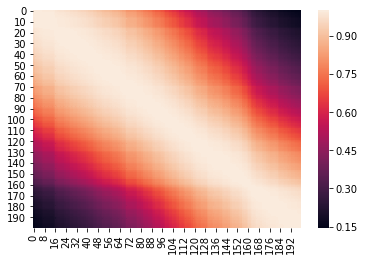

In [9]:
# 热力图
m = np.shape(xMat)[0]
wMat = np.mat(np.ones((m,m)))
for j in range(m):
    wMat[:,j] = kernel(xMat[sortedIndex][:,0,:][j],xMat[sortedIndex][:,0,:],0.5)
sns.heatmap(wMat)

In [26]:
# 对比两者，还是seaborn对于python的支持好一些
# 热力图
# 这里有几项注意点：
# 首先，要观察原始数据分布，尤其是对角线朝向，一般是主对角线
# pecharts 的绘图逻辑是：从左下角点开始，先遍历横坐标，再遍历纵坐标
data1 = [[i, j, 100*wMat[i, m-j-1]] for i in range(m) for j in range(m)] 
heatmap1 = HeatMap()
heatmap1.add("热力图直角坐标系",xMat[sortedIndex][:,0,:][:,1].T.A[0], xMat[sortedIndex][:,0,:][::-1,1].T.A[0], data1, is_visualmap=True,
            visual_text_color="#000", visual_orient='horizontal')
heatmap1.render('heatmap1.html')

data2 = [[i, j, 100*wMat[i, j]] for i in range(m) for j in range(m)] 
heatmap2 = HeatMap()
heatmap2.add("热力图直角坐标系",xMat[sortedIndex][:,0,:][:,1].T.A[0], xMat[sortedIndex][:,0,:][:,1].T.A[0], data2, is_visualmap=True,
            visual_text_color="#000", visual_orient='horizontal')
heatmap2.render('heatmap2.html')

In [10]:
yHat = lwlrTest(xArr,xArr,yArr,k=0.003)
yHat

array([ 3.20200665,  3.75940186,  4.53670134,  4.25050564,  4.56094936,
        3.93721635,  3.53392289,  3.15405352,  3.12604366,  3.14881027,
        3.47887849,  4.1229893 ,  4.24110737,  3.47648492,  4.6329319 ,
        3.96601531,  3.52772681,  3.15257242,  4.09411431,  3.4534635 ,
        3.21009102,  3.19948401,  4.63028986,  4.2958291 ,  3.08502796,
        3.50177161,  3.14348409,  3.36386424,  3.99136073,  3.89052382,
        3.15925294,  3.15754913,  3.85062092,  4.63492639,  4.56823397,
        3.59158542,  3.59663089,  4.60657847,  3.6768816 ,  4.64165522,
        3.18193434,  4.23203805,  3.5596501 ,  3.45576256,  3.83408612,
        3.1760528 ,  3.49935304,  3.92943323,  3.90635534,  4.23852193,
        4.21692815,  3.50430539,  3.22426953,  4.27810533,  3.51013716,
        3.50537991,  3.85983822,  4.27479904,  3.91450832,  3.57019624,
        3.15346336,  4.22473636,  4.23785765,  4.23873712,  3.17953817,
        3.99733495,  3.55097598,  3.56148314,  4.24145117,  3.16

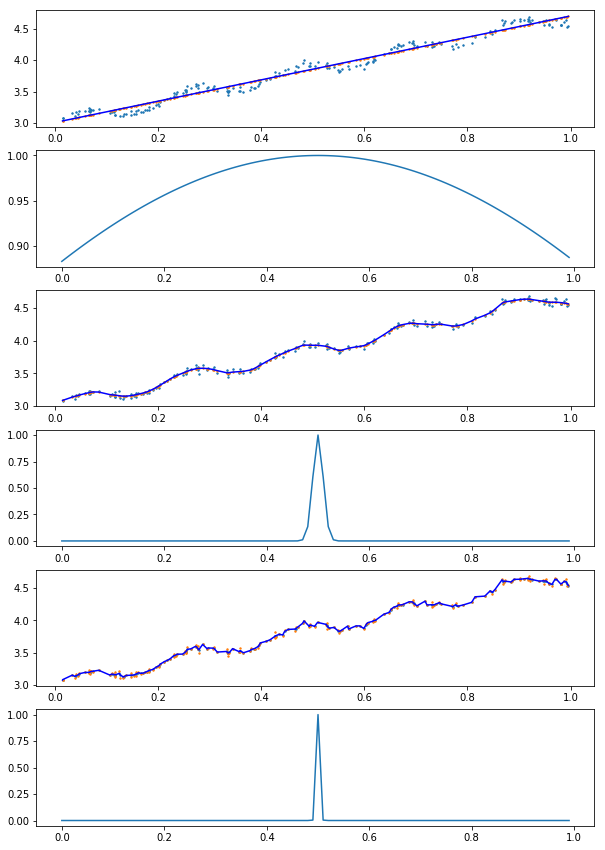

In [60]:
# 绘制不同k值情况下的拟合曲线，以及高斯分布
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
x = np.mat(np.arange(0,1,0.01)).T

fig = plt.figure(figsize=(10,15) )
fig.clf

yHat1 = lwlrTest(xArr,xArr,yArr,k=1.0)
ax1 = fig.add_subplot(611)
ax1.scatter(xMat[:,1].T.A[0],yMat[:,0].T.A[0],s = 2) # 散点图要求数据维度为1维数组
ax1.scatter(xMat[:,1].T.A[0],yHat1,s = 2) 
# 绘制散点图可以避免因为数据点横坐标混乱导致的直线抽疯
sortedIndex = xMat[:,1].argsort(0)
ax1.plot(xMat[sortedIndex][:,0,:][:,1],yHat1[sortedIndex],c='b') # 风骚的argsort索引


w1 = kernel(0.5,x,1.0)
ax2 = fig.add_subplot(612)
ax2.plot(x.T.A[0],w1.T.A[0])

yHat2 = lwlrTest(xArr,xArr,yArr,k=0.01)
ax3 = fig.add_subplot(613)
ax3.scatter(xMat[:,1].T.A[0],yMat[:,0].T.A[0],s = 2) 
ax3.scatter(xMat[:,1].T.A[0],yHat2,s = 2) 
ax3.plot(xMat[sortedIndex][:,0,:][:,1],yHat2[sortedIndex],c='b') 

w2 = kernel(0.5,x,0.01)
ax4 = fig.add_subplot(614)
ax4.plot(x.T.A[0],w2.T.A[0])

yHat3 = lwlrTest(xArr,xArr,yArr,k=0.003)
ax5 = fig.add_subplot(615)
ax5.scatter(xMat[:,1].T.A[0],yHat3,s = 2) 
ax5.scatter(xMat[:,1].T.A[0],yMat[:,0].T.A[0],s = 2) 
ax5.plot(xMat[sortedIndex][:,0,:][:,1],yHat3[sortedIndex],c='b') 

w3 = kernel(0.5,x,0.003)
ax6 = fig.add_subplot(616)
ax6.plot(x.T.A[0],w3.T.A[0])

plt.show()

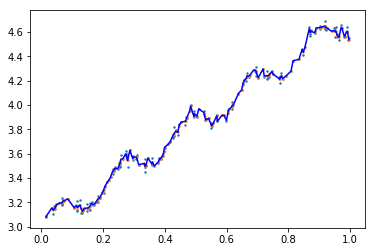

In [16]:
yHat = lwlrTest(xArr,xArr,yArr,k=0.003)
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].T.A[0],yMat[:,0].T.A[0],s = 2) # 散点图要求数据维度为1维数组
ax.scatter(xMat[:,1].T.A[0],yHat,s = 2) 
# 绘制散点图可以避免因为数据点横坐标混乱导致的直线抽疯
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
sortedIndex = xMat[:,1].argsort(0)
ax.plot(xMat[sortedIndex][:,0,:][:,1],yHat[sortedIndex],c='b') # 风骚的argsort索引
plt.show()

In [103]:
# 使用相关系数衡量预测值与实际值的相似程度
np.corrcoef(yHat.T,yMat.T)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])